# Linear Model For Regression
### 1. Lasso
$$\min_{w}\frac{1}{N}\|Xw-y\|_2^2 + \alpha \|w\|_1$$
### 2. Ridge Regression
$$\min_{w}\frac{1}{N}\|Xw-y\|_2^2 + \alpha \|w\|_2$$
### 3.  Elastic Net
$$\min_{w}\frac{1}{N}\|Xw-y\|_2^2 + \alpha \rho \|w\|_1 + \frac{\alpha (1-\rho)}{2}\|w\|_2^2$$
##  [Regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* explained_variance_score
* mean_absolute_error
* mean_squared_error
* median_absolute_error
* r2_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model

### Data Preparation: Generate train sample with sparse coeffieients
* Data = train set + test set

In [3]:
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

In [4]:
# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

### Ridge Regression

In [5]:
reg = linear_model.Ridge(alpha = .5)
y_pred_ridge = reg.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(reg)
print("r^2 on test data : %f" % r2_score_ridge)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
r^2 on test data : -0.160269


### Lasso

In [6]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.868223


### Elastic Net

In [8]:
from sklearn.linear_model import ElasticNet
elatNet = ElasticNet(random_state=0)
y_pred_elat = elatNet.fit(X_train, y_train).predict(X_test)
r2_score_elat = r2_score(y_test, y_pred_elat)
print("r^2 on test data : %f" % r2_score_elat)

r^2 on test data : 0.311518


## Plot coefficients of model

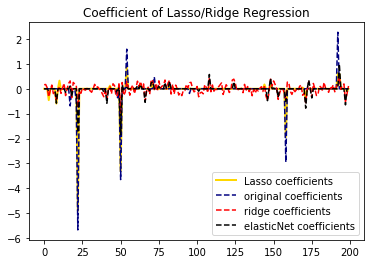

In [9]:
# #############################################################################
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.plot(reg.coef_, '--', color='red', label='ridge coefficients')
plt.plot(elatNet.coef_, '--', color='black', label='elasticNet coefficients')
plt.legend(loc='best')
plt.title("Coefficient of Lasso/Ridge Regression")
plt.show()